<a href="https://colab.research.google.com/github/hariprasanth-22/Fashion-Mnist-Using-CNN-Algorithm/blob/main/Fashion_Mnist(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. Preprocess
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension: (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])

# 4. Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

# 7. Save Model
model.save("fashion_model.hdf5")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.6689 - loss: 0.9140 - val_accuracy: 0.8518 - val_loss: 0.4099
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 61ms/step - accuracy: 0.8331 - loss: 0.4609 - val_accuracy: 0.8732 - val_loss: 0.3413
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.8571 - loss: 0.4001 - val_accuracy: 0.8803 - val_loss: 0.3152
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.8711 - loss: 0.3601 - val_accuracy: 0.8937 - val_loss: 0.2899
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.8748 - loss: 0.3445 - val_accuracy: 0.8978 - val_loss: 0.2776
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.8801 - loss: 0.3278 - val_accuracy: 0.9012 - val_loss: 0.2710
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.8889 - loss: 0.3048 - val_accuracy: 0.9037 - val_loss: 0.2618
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.8947 - loss: 0.2908 - 


Test accuracy: 0.9032


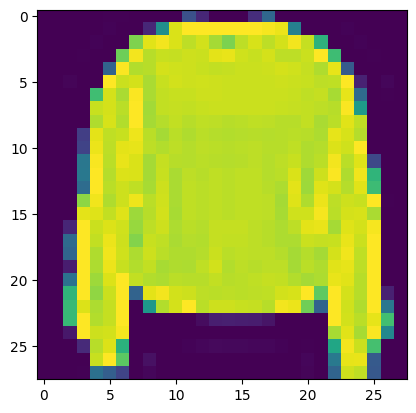

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[7])